<a href="https://colab.research.google.com/github/Rgarlay/PWSkills_Assignments/blob/main/Assignment%3A%20Statistics%202/Stastistics_2_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practical Questions.

#Statistics 2

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import plotly.express as ex

from scipy.stats import chi2
import plotly.graph_objects as go

from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

###1. Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results.

In [ ]:
##To perform z function,

def z_score(pop_mean,sample_mean,std_dev, n):
  '''
  all arguments: int/float.
  Following function take all the
  required parameters and corrospondingly gives out
  the z_score.
  '''
  z_score_val = (sample_mean - pop_mean)/((std_dev)/np.sqrt(n))
  z_score_val = np.abs(z_score_val)
  return z_score_val

z_score_val = z_score(pop_mean = 25.38,
                      sample_mean = 25.2,
                      std_dev = 14.01,
                      n = 100 )
print('The z_score for the follwing distribtion is',z_score_val)


The z_score for the follwing distribtion is 0.1284796573875801


###2. Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python.

In [ ]:
##Defining our quantities
np.random.seed(42)
a = np.random.randint(1,50,500)
sample_1 = np.random.choice(a, size = 100,replace=False)


In [ ]:
##Doing the z-score test.
mean_1 = np.mean(sample_1)
mean_pop = np.mean(a)

std_1 = np.std(sample_1)
std_pop = np.std(a)

print(f'mean of the sample is {mean_1}, and for the population is {mean_pop}')

no_of_samples = np.shape(sample_1)[0]

z_score = (mean_1-mean_pop)/(std_pop/np.sqrt(no_of_samples))
z_score_abs = np.abs(z_score)
pvalue =2 * stats.norm.sf(z_score_abs)
print(f'and p_val is: {pvalue}')


mean of the sample is 25.2, and for the population is 25.38
and p_val is: 0.8977754815795624


Taking significance level of 0.05, we have strong evidence in favor of the null hypothesis. Also note that the means of populations and samples do not differ too much in the first place, hence any variation can be attributed to randomness.

####3. Implement a one-sample Z-test using Python to compare the sample mean with the population mean.

In [74]:
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)
penguins.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
334,Gentoo,Biscoe,46.2,14.1,217.0,4375.0,Female


In [ ]:
sample_size = int((a.shape[0]/100)*25) #we will take 25% of population in sample.
a = penguins['bill_length_mm'].to_numpy()
b = np.random.choice(a, size=sample_size, replace=False)

In [ ]:
pop_mean = np.mean(a)
sample_mean = np.mean(b)

pop_std = np.std(a)

root_n = np.sqrt(sample_size)

z_score = (sample_mean - pop_mean)/(pop_std/root_n)

z_score

-1.2041270951654919

####4.  Perform a two-tailed Z-test using Python and visualize the decision region on a plot.

In [ ]:
np.random.seed(42)
a = np.random.normal(1,50,500)
sample_1 = np.random.choice(a, size = 100,replace=False)


In [ ]:
##Doing the z-score test.
mean_1 = np.mean(sample_1)
mean_pop = np.mean(a)

std_1 = np.std(sample_1)
std_pop = np.std(a)

print(f'mean of the sample is {mean_1}, and for the population is {mean_pop}')

no_of_samples = np.shape(sample_1)[0]

z_score = (mean_1-mean_pop)/(std_pop/np.sqrt(no_of_samples))
z_score_abs = np.abs(z_score)
pvalue =2 * stats.norm.sf(z_score_abs)
print(f'and p_val is: {pvalue}')


mean of the sample is 0.9129621772600216, and for the population is 1.3418997294323785
and p_val is: 0.9302629333121777


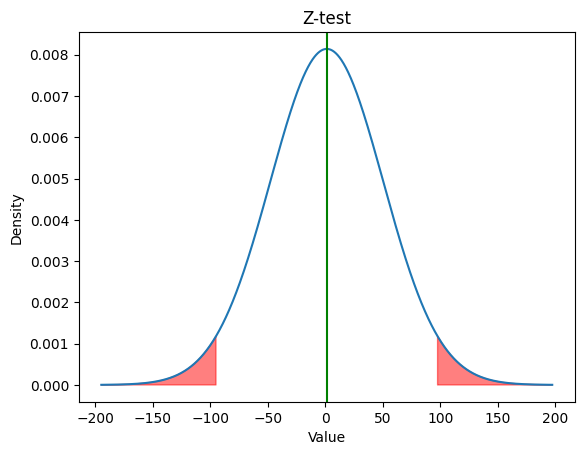

In [ ]:
from scipy.stats import norm
x = np.linspace(mean_pop - 4*std_pop, mean_pop + 4*std_pop, 1000)
y = norm.pdf(x, mean_pop, std_pop)
plt.plot(x,y)
plt.fill_between(x,y, where=(x <= mean_pop - 1.96*std_pop) | (x>= mean_pop + 1.96*std_pop), color='red',alpha=0.5, label ='Rejection_region')
plt.axvline(x = mean_pop, color = 'green', label = 'Mean_value line')
plt.title("Z-test")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

###5. Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing?

In [ ]:
#Not able to solve this

###6. Write a Python program to perform an independent T-test and interpret the results?

In [ ]:
np.random.seed(52)
a = np.random.normal(1,5,20)
b = np.random.normal(1,5,20)

##let's do t test.
mean_a = np.mean(a)
mean_b = np.mean(b)

std_a = np.std(a, ddof=1)
std_b = np.std(b, ddof=1)

a_1 = std_a**2/20
b_1 = std_b**2/20

t_test = (mean_b - mean_a)/np.sqrt(a_1 + b_1)
print(t_test)

0.5201553443156742


The calculated t-statistic tells you how much the means of the two samples differ relative to the variability within each sample. If the t-value is large (in magnitude), it suggests a significant difference between the two groups. You should compare it with the critical value from the t-distribution for your significance level (typically 0.05) to determine statistical significance.

###7. Perform a paired sample T-test using Python and visualize the comparison results.

In [ ]:
##Say these are the test marks of students before and after some
##new educational boost program.
before = np.array([68, 70, 72, 65, 74, 71, 69, 73, 75, 70])
after = np.array([72, 74, 76, 70, 77, 73, 72, 76, 78, 74])

difference = after - before

diff_mean = np.mean(difference)

denom_ = before.shape[0] - 1

num_ = np.sum(np.square(difference - diff_mean))

std_dev = np.sqrt(num_/denom_)

t_stat = diff_mean/(std_dev / np.sqrt(before.shape[0]))

t_stat

13.02364713186689

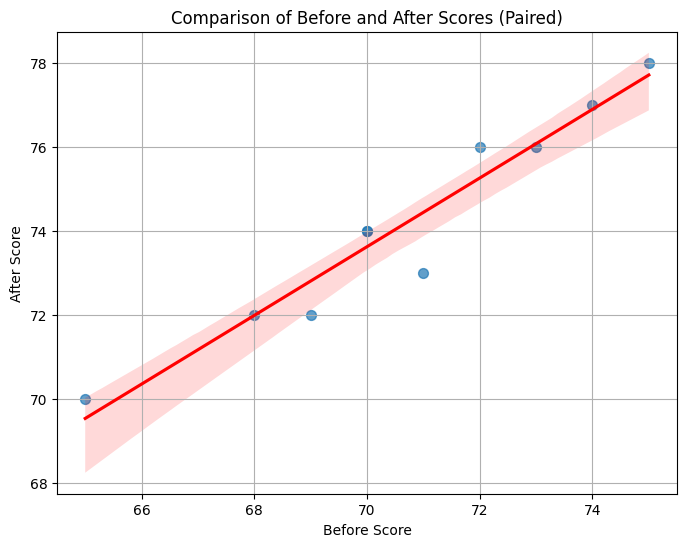

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x=before, y=after, scatter_kws={'alpha': 0.7, 's': 50}, line_kws={'color': 'red'})
plt.xlabel("Before Score")
plt.ylabel("After Score")
plt.title("Comparison of Before and After Scores (Paired)")
plt.grid(True)

###8. Simulate data and perform both Z-test and T-test, then compare the results using Python.

In [ ]:
np.random.seed(12)
a = np.random.normal(1,5,30)
b = np.random.normal(1,5,30)

mean_a = np.mean(a)
mean_b = np.mean(b)

z_std_a = np.std(a)
z_std_b = np.std(b)

n = 30

a_1 = np.square(z_std_a)/n
b_1 = np.square(z_std_b)/n
z_test = (mean_a - mean_b)/np.sqrt(a_1 + b_1)

##calculating t statistics
difference = mean_a - mean_b

std_a = np.std(a, ddof = 1)
std_b = np.std(b, ddof = 1)

n = 30

a_2 = np.square(std_a)/n
b_2 = np.square(std_b)/n

t_score = difference / np.sqrt(a_2+ b_2 )
t_score

print(f'Value of z_score is: {np.abs(z_test)}. And value of t_score is {np.abs(t_score)}')

Value of z_score is: 0.6919623502262245. And value of t_score is 0.6803319025737219


They do not vary too much from each other.

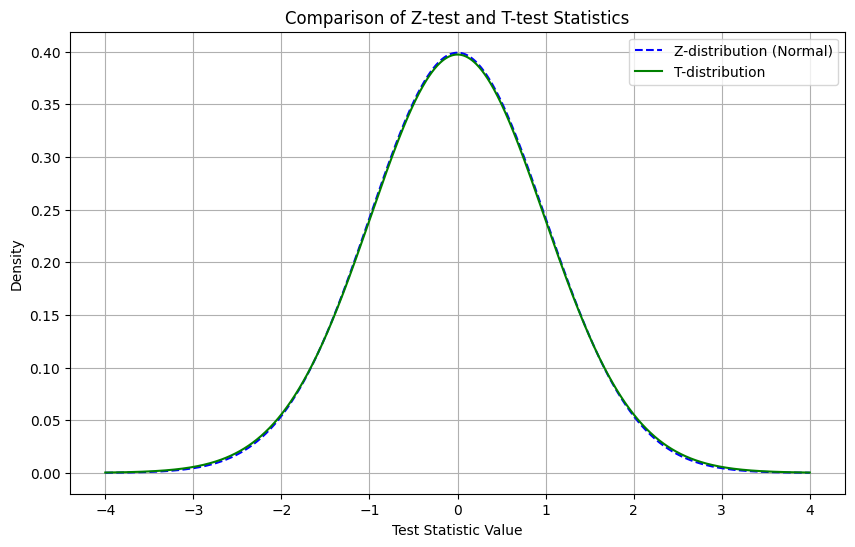

In [ ]:
x_vals = np.linspace(-4, 4, 1000)
z_dist = stats.norm.pdf(x_vals, 0, 1)
t_dist = stats.t.pdf(x_vals, df=len(a) + len(b) - 2)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, z_dist, label='Z-distribution (Normal)', color='blue', linestyle='--')
plt.plot(x_vals, t_dist, label='T-distribution', color='green')
plt.title('Comparison of Z-test and T-test Statistics')
plt.xlabel('Test Statistic Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

###9.  Write a Python function to calculate the confidence interval for a sample mean and explain its significance.

In [ ]:
np.random.seed(22)
group = np.random.normal(1,20,100)
grp_mean = np.mean(group)
group_std = np.std(group, ddof = 0)
n = 100

##We will follow z_statistics
##setting alpha = 0.05, we will have Z_(alpha/2) = 1.96

z_alpha_2 = 1.96

margin_of_error = z_alpha_2 * (group_std/np.sqrt(n))

Conf_Int_positive = grp_mean + margin_of_error
Conf_Int_negative = grp_mean - margin_of_error

print(f'Confidence interval lies between {Conf_Int_positive} - {Conf_Int_negative}')

Confidence interval lies between 3.786073140160898 - -3.9330891646509683


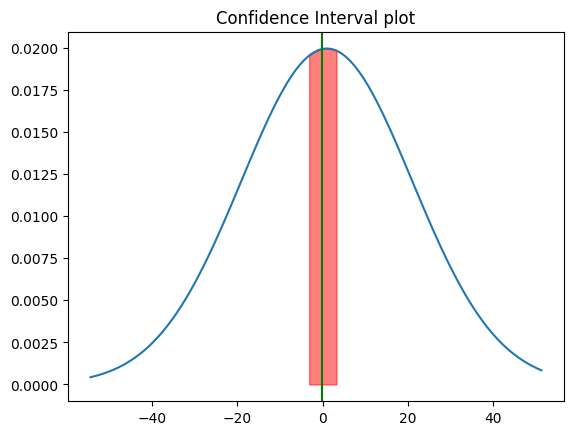

In [ ]:
x = np.linspace(np.min(group),np.max(group),100)
y = stats.norm.pdf(x,1,20)
plt.plot(x,y)
plt.axvline(x = grp_mean, color = 'green', label = 'Mean_value line')
plt.fill_between(x,y, where =  (x>=Conf_Int_negative) & (x<=Conf_Int_positive), color = 'red',alpha = 0.5,
                 label = 'confidence interval')
plt.title('Confidence Interval plot')
plt.show()

###10.  Write a Python program to calculate the margin of error for a given confidence level using sample data.

In [ ]:
def margin_of_error(sample_data, alpha = 0.05):
  '''
  We're calculating margin of error for z-statistics.
  '''
  import scipy.stats as stats
  import numpy as np
  if not isinstance(sample_data, np.ndarray):
    sample_data = sample_data.to_numpy()

  std_dev = np.std(sample_data)
  Z_alpha_2 = stats.norm.ppf(1-alpha/2)
  length_root = np.sqrt(np.shape(sample_data)[0])
  margin_err = Z_alpha_2 * (std_dev/length_root)
  return margin_err

In [ ]:
np.random.seed(32)
a = np.random.normal(1,20,100)
margin = margin_of_error(a)
margin

4.031954719166985

###12. Perform a Chi-square test for independence between two categorical variables in Python.

In [ ]:
dataset = sns.load_dataset('tips')

In [ ]:
dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
cont_table = pd.crosstab(dataset['sex'],dataset['smoker'])

In [ ]:
cont_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [ ]:
observed_values = cont_table.values
observed_values

array([[60, 97],
       [33, 54]])

In [ ]:
expected_vals = stats.chi2_contingency(cont_table)
expected_vals

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]]))

In [ ]:
vals = expected_vals[3]
vals

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [ ]:
no_of_rows = len(cont_table.iloc[0:2,0])
no_of_cols = len(cont_table.iloc[0,0:2])
dof = (no_of_rows - 1)*(no_of_cols - 1)
print('Degree of freedom is',dof)

Degree of freedom is 1


In [ ]:
chi_square = sum([(o-e)**2/e for o,e in zip(observed_values,vals)])
chi_square_stat = chi_square[0]+chi_square[1]
chi_square_stat

0.001934818536627623

In [ ]:
from scipy.stats import chi2
alpha = 0.05
critical_value = chi2.ppf(q = 1-alpha, df = dof)
critical_value

3.841458820694124

As the test statistic lie above critical value, we will attribute to apparant relation to randomness and fail to reject null hypothesis.

###13.  Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data.

We calculate expected frequency by producting column and rows and dividing that by totals.

In [5]:
##Let's assume that we are ranking exce

observed = np.array([[30, 20],  # Young
                     [40, 35],  # Middle-aged
                     [25, 50]]) # Senior

def expected_freq(observed_data):
  n_columns = np.sum(observed, axis = 0)
  n_rows = np.sum(observed, axis = 1, keepdims=True)
  grand_total = np.sum(observed)

  expected = (n_rows @ n_columns.reshape(1,-1))/grand_total
  return expected

expected = expected_freq(observed)
expected


array([[23.75 , 26.25 ],
       [35.625, 39.375],
       [35.625, 39.375]])

###14.  Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution.

In [6]:
# Observed frequencies (from rolling the die)
observed = np.array([18, 22, 16, 20, 24, 20])# Number of times each face appeared

# Expected frequencies (assuming a fair die)
expected = np.full(6, 120/6)


In [17]:
##assume alpha is 0.05.

dof = np.shape(observed)[0] - 1
alpha = 0.05
#Now we calculate chi2

chi_2 = sum([(o-e)**2/e for o,e in zip(observed,expected)])
chi_critical = chi2.ppf(q = 1-alpha, df = dof)
print(f'Critical value: {chi_critical}, chi_2 test value: {chi_2}')

Critical value: 11.070497693516351, chi_2 test value: 2.0


####As chi_2 is lesser than critical value, we fail to reject null hypothesis.

###15. Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics.

In [40]:
dof = np.array([1,2,3,4,5,6,7,8,9])
colors = ['violet','indigo','blue','green','yellow','orange','red','purple','cyan']
x = np.linspace(0,20,1000)

fig = go.Figure()

for i,df in enumerate(dof):
  y = stats.chi2.pdf(x,df)

  fig.add_trace(go.Scatter(x = x,y = y, mode = 'lines',
                         name=f'pdf for dof {df}', line=dict(color=colors[i])))

  fig.update_layout(title='ppf function',
                  xaxis_title = 'X',
                  yaxis_title = 'Density')
  fig.update_yaxes(range=[0, 0.5])
fig.show()

The graph may not be visible in github copy. In that case, I will put it in `readme.md` .

###16. Implement an F-test using Python to compare the variances of two random samples.

In [45]:
np.random.seed(20)
a = np.random.randint(1,20,50)
b = np.random.randint(1,10,50)

a_var = np.square(np.std(a, ddof = 1))
b_var = np.square(np.std(b, ddof = 1))

F_test = a_var/b_var
F_test

apha = 0.05
dof_1 = np.shape(a)[0] - 1
dof_2 = np.shape(b)[0] - 1

f_critical = stats.f.ppf(1-alpha,dof_1,dof_2)

print(f'Critical value is {f_critical}, and F-test value is: {F_test}')

Critical value is 1.6072894627459253, and F-test value is: 4.150999999999999


As F_stat > F_critical, we reject null hypothesis.

###17. Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the results.

In [46]:
group_1 = [100, 102, 101, 98, 99]
group_2 = [110, 112, 113, 115, 116]
group_3 = [90, 92, 91, 89, 88]
group_4 = [105, 107, 106, 104, 103]


In [59]:
f_stat, p_val = stats.f_oneway(group_1, group_2, group_3, group_4)

In [63]:
alpha = 0.05
F_critical = stats.f.ppf(1 - alpha, df_between, df_within)
print(f"F-statistic: {f_stat}")
print(f"F-critical (alpha = 0.05): {f_critical}")

F-statistic: 142.64141414141426
F-critical (alpha = 0.05): 1.6072894627459253


As F_cric < F_test_statistic, we conclude that there is atleast 1 group whose mean is significantly different.

###18.  Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results.

In [64]:
import numpy as np
import scipy.stats as stats

group_1 = [100, 102, 101, 98, 99]
group_2 = [110, 112, 113, 115, 116]
group_3 = [90, 92, 91, 89, 88]
group_4 = [105, 107, 106, 104, 103]

data = [group_1, group_2, group_3, group_4]

n_groups = len(data)
total_data_points = sum([len(group) for group in data])

grand_mean = np.mean([item for group in data for item in group])

SSB = 0
for group in data:
    group_mean = np.mean(group)
    n = len(group)
    SSB += n * (group_mean - grand_mean) ** 2

df_between = n_groups - 1




In [67]:
SSW = 0
for group in data:
    group_mean = np.mean(group)
    for value in group:
        SSW += (value - group_mean) ** 2

df_within = total_data_points - n_groups

MSB = SSB / df_between
MSW = SSW / df_within

F_statistic = MSB / MSW

alpha = 0.05
F_critical = stats.f.ppf(1 - alpha, df_between, df_within)

p_value = 1 - stats.f.cdf(F_statistic, df_between, df_within)

F_statistic, F_critical, p_value

(142.64141414141417, 3.238871517453585, 9.353295915559556e-12)

As F_crit<F_stat, we can reject null hypothesis


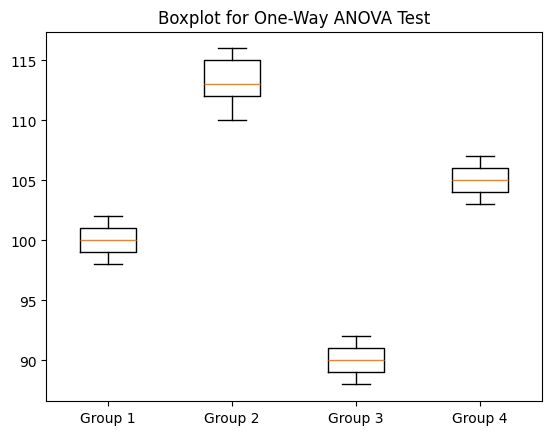

In [69]:
plt.boxplot(data, vert=True)
plt.xticks([1, 2, 3, 4], ['Group 1', 'Group 2', 'Group 3', 'Group 4'])
plt.title("Boxplot for One-Way ANOVA Test")
plt.show()

###19. Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA.

In [40]:
group_1 = [100, 88, 107, 68, 139]
group_2 = [120, 102, 173, 155, 166]
group_3 = [90, 52, 31, 89, 98]

def tests(*groups):
  for i, group in enumerate(groups, start=1):
    ##Checking for normality
    stat, p_value = stats.shapiro(group)
    print(f"Group {i}: W-statistic = {stat:.4f}, p-value = {p_value:.4f}")
    if p_value > 0.05:
      print(f"Group {i} follows a normal distribution.\n")
    else:
      print(f"Group {i} does not follow a normal distribution.\n")
    ##Checking for equal variance
    stat, p_value = stats.levene(*groups)
    print(f"Levene’s Test: W-statistic = {stat:.4f}, p-value = {p_value:.4f}")
    if p_value > 0.05:
        print("Variances are equal (homoscedasticity assumption holds).\n")
    else:
        print("Variances are NOT equal (heteroscedasticity detected).\n")
    stat, p_value = stats.kruskal(*groups)
    print(f"Kruskal-Wallis Test: H-statistic = {stat:.4f}, p-value = {p_value:.4f}")
    if p_value > 0.05:
        print("Groups are independent (same distribution).\n")
    else:
        print("Groups are NOT independent (different distributions).\n")

tests(group_1,group_2,group_3)


Group 1: W-statistic = 0.9793, p-value = 0.9311
Group 1 follows a normal distribution.

Levene’s Test: W-statistic = 0.0803, p-value = 0.9233
Variances are equal (homoscedasticity assumption holds).

Kruskal-Wallis Test: H-statistic = 8.5400, p-value = 0.0140
Groups are NOT independent (different distributions).

Group 2: W-statistic = 0.8983, p-value = 0.4004
Group 2 follows a normal distribution.

Levene’s Test: W-statistic = 0.0803, p-value = 0.9233
Variances are equal (homoscedasticity assumption holds).

Kruskal-Wallis Test: H-statistic = 8.5400, p-value = 0.0140
Groups are NOT independent (different distributions).

Group 3: W-statistic = 0.8558, p-value = 0.2135
Group 3 follows a normal distribution.

Levene’s Test: W-statistic = 0.0803, p-value = 0.9233
Variances are equal (homoscedasticity assumption holds).

Kruskal-Wallis Test: H-statistic = 8.5400, p-value = 0.0140
Groups are NOT independent (different distributions).



###20. Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the results.

In [41]:
data = {
    'Treatment': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Score': [85, 90, 88, 92, 80, 84, 78, 85, 95, 98, 92, 94]
}

df = pd.DataFrame(data)

In [43]:
model = ols('Score ~ C(Treatment) +C(Gender) + C(Treatment):C(Gender)',data = df).fit()
      ##ols means ordinary least square
anova_result = anova_lm(model)

print(anova_result)

                         df      sum_sq     mean_sq          F    PR(>F)
C(Treatment)            2.0  338.666667  169.333333  47.255814  0.000213
C(Gender)               1.0   52.083333   52.083333  14.534884  0.008838
C(Treatment):C(Gender)  2.0    4.666667    2.333333   0.651163  0.554715
Residual                6.0   21.500000    3.583333        NaN       NaN


<ipython-input-44-7019081bb765>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Treatment', y='Score', hue='Gender', data=df, markers=['o', 's'], linestyles=['-', '--'], ci=None)


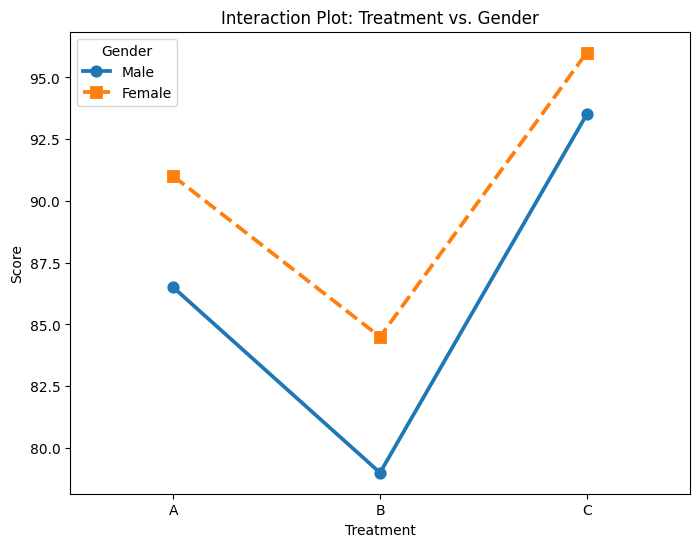

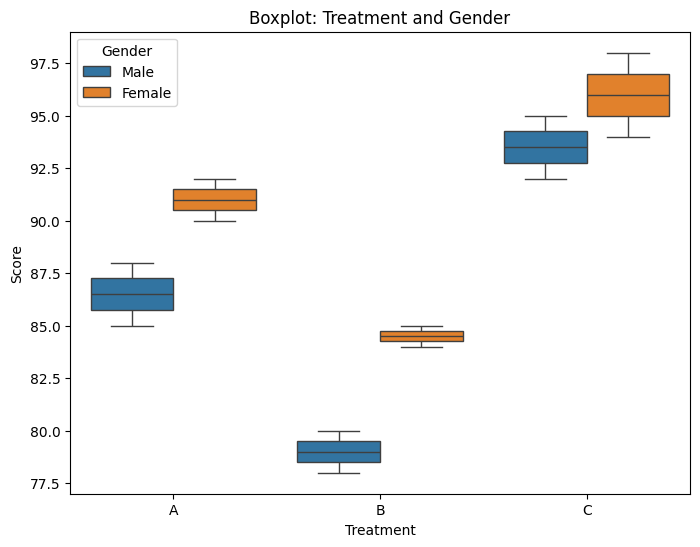

In [44]:
plt.figure(figsize=(8, 6))
sns.pointplot(x='Treatment', y='Score', hue='Gender', data=df, markers=['o', 's'], linestyles=['-', '--'], ci=None)
plt.title('Interaction Plot: Treatment vs. Gender')
plt.show()

# Boxplot to show distribution of scores by Treatment and Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Treatment', y='Score', hue='Gender', data=df)
plt.title('Boxplot: Treatment and Gender')
plt.show()

###21. Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing.

In [80]:
a = np.random.randint(1,20,100)
b = np.random.randint(1,15,100)

##To visualize F dist.
x = np.linspace(0,5,1000)

f_dist = go.Figure()

dof_1 = [1,2,3,4,5,6]
dof_2 = [2,3,4,5,6,7]
for i,j in zip(dof_1,dof_2):
  y = stats.f.pdf(x,i,j)

  f_dist.add_trace(go.Scatter(x=x,y=y,mode = 'lines', name=f'dof_1: {i}, dof_2: {j}',
                              hovertext=f'dof_1: {i}, dof_2: {j}',
                              hoverinfo='text'))


f_dist.update_layout(
    title='F-Distribution Percent-Point Function',
    xaxis_title='x',
    yaxis_title='y',
    template='plotly')

f_dist.update_yaxes(range=[0, 1])
f_dist.show()

F-test is used in hypothesis testing to detemine whether the variance of one of the sample data is different from the rest.

###22.D Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means.

Already answered in ##18 question

###23. Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means.

In [91]:
np.random.seed(23)
population = np.random.randn(100)

ten_percent = int(np.shape(population)[0]*0.25)

sample = np.random.choice(population, size = ten_percent, replace=False)

mu_0 = 0
sigma = np.std(population)

sample_mean = np.mean(sample)

z_stat = (sample_mean - mu_0) / (sigma / np.sqrt(ten_percent))

p_value = 2 * stats.norm.sf(abs(z_stat))
alpha = 0.05
if p_value>alpha:
  print('We fail to reject the null hypothesis.')
else:
  print('We reject the null hypothesis.')

We fail to reject the null hypothesis.


###24. Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results.

In [93]:
np.random.seed(42)
sample_data = np.random.normal(loc=10, scale=5, size=50)

sigma_0 = 25
n = len(sample_data)
s2 = np.var(sample_data, ddof=1)

chi_square_stat = (n - 1) * s2 / sigma_0

df = n - 1

p_value = 2 * min(stats.chi2.cdf(chi_square_stat, df), 1 - stats.chi2.cdf(chi_square_stat, df))

print(f"Chi-square statistic: {chi_square_stat}")
print(f"P-value: {p_value}")

Chi-square statistic: 42.71513231889158
P-value: 0.5511168655461796


In [94]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The population variance is significantly different from 25.")
else:
    print("Fail to reject the null hypothesis: The population variance is not significantly different from 25.")

Fail to reject the null hypothesis: The population variance is not significantly different from 25.


###25.Write a Python script to perform a Z-test for comparing proportions between two datasets or groups.

In [21]:
def z_prop(success_1,success_2,n1,n2):
  import numpy as np
  from scipy.stats import norm
  p1 = success_1/n1
  p2 = success_2/n2

  p = (success_1 + success_2)/(n1+n2)

  z_score = (p1-p2)/np.sqrt(p*(1-p)*((1/n1) + (1/n2)))
  z_score = np.abs(z_score)

  p_val = 2*(1-norm.cdf(abs(z_score)))
  return z_score,p_val


In [23]:
x1 = 30  # Number of conversions with design A
n1 = 200  # Total visitors to design A
x2 = 20  # Number of conversions with design B
n2 = 200 # Total visitors to design B
alpha = 0.05


result,p_value = z_prop(success_1 = x1,success_2 = x2, n1=n1 , n2=n2)
result,p_value

if p_value>alpha/2:
  print('We fail to reject Null Hypothesis.')
else:
  print('Null Hypothesis is rejected.')

We fail to reject Null Hypothesis.


###26.  Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results.

In [33]:
import numpy as np
from scipy.stats import f

def F_test(sample_1, sample_2):
    sample_1 = np.array(sample_1)
    sample_2 = np.array(sample_2)
    n1 = len(sample_1)
    n2 = len(sample_2)
    var_1 = np.var(sample_1, ddof=1)
    var_2 = np.var(sample_2, ddof=1)
    if var_1 > var_2:
        F_value = var_1 / var_2
        df1 = n1 - 1
        df2 = n2 - 1
    else:
        F_value = var_2 / var_1
        df1 = n2 - 1
        df2 = n1 - 1
    p_val = 2 * min(f.sf(F_value, df1, df2), f.cdf(F_value, df1, df2))
    plt.figure(figsize=(8, 5))
    plt.boxplot([sample_1, sample_2], labels=[f'{sample_1}', f'{sample_2}'])
    plt.title('Box Plot Comparison of Variances')
    plt.ylabel('Value')
    plt.show()

    return F_value, p_val

<ipython-input-33-cdb39fccbd33>:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([sample_1, sample_2], labels=[f'{sample_1}', f'{sample_2}'])


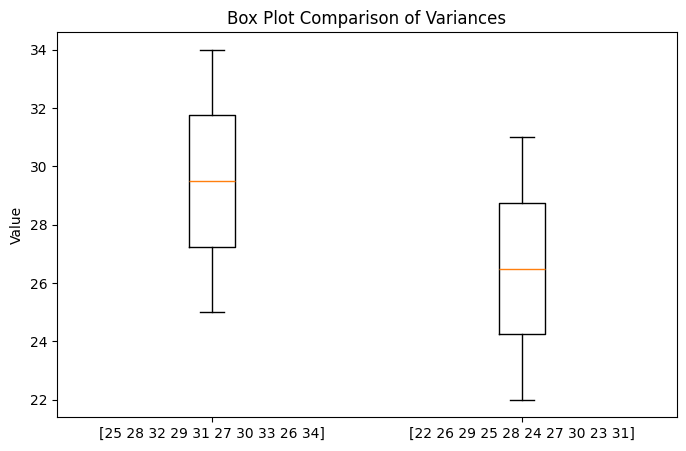

In [34]:
group1 = [25, 28, 32, 29, 31, 27, 30, 33, 26, 34]
group2 = [22, 26, 29, 25, 28, 24, 27, 30, 23, 31]

F_val,p_val = F_test(group1,group2)

In [36]:
##Assume we take 0.05 significance level
alpha = 0.05
critical_f = stats.f.ppf(1 - alpha, len(group1) -1, len(group2)-1)
if F_val>=critical_f:
  print('we reject the null hypothesis')
else:
  print('We fail to reject null hypothesis.')


1.0 0.9999999999999998


###27. Perform a Chi-square test for goodness of fit with simulated data and analyze the results.

In [70]:
##Let's take 5 colors and ratio of people with them as their fav. color.
expected_probs = [0.30, 0.20, 0.25, 0.15, 0.10]
colors = ['Red', 'Blue', 'Green', 'Yellow', 'Orange']

In [71]:
people = 100
np.random.seed(11)
observed = np.random.choice(colors, size = people,p=expected_probs )
observed = pd.DataFrame(observed).value_counts().sort_index()
expected_counts  = [i * people for i in expected_probs]
results_df = pd.DataFrame({'Color': colors,
                           'Expected': expected_counts,
                           'Observed': observed})
results_df.sample()

,Color,Expected,Observed
0,,,
Green,Blue,20.0,25


In [72]:
chi_2 = sum(((results_df['Expected'] - results_df['Observed'] )**2)/results_df['Expected'])
alpha = 0.05
chi_2_crit = stats.chi2.ppf(q = 1-alpha,df = results_df.shape[0] - 1)

In [73]:
if chi_2>=chi_2_crit:
  print('we reject the null hypothesis')
else:
  print('We fail to reject null hypothesis.')

we reject the null hypothesis
